## **Prueba** - Análisis Estadístico

La OMS estima que cada año se producen 12 millones de muertes en todo el mundo debido a enfermedades cardíacas, producidas en su gran mayoría por enfermedades cardiovasculares. El pronóstico temprano de las enfermedades cardiovasculares puede ayudar en la toma de decisiones sobre cambios en el estilo de vida en pacientes de alto riesgo y reducir las complicaciones. La base de datos cardio.csv contiene mediciones realizadas a pacientes hace 10 años, entre los cuales se encuentran

* **Sex:** M - F
* **Age:** edad
* **Education:** codificada, considerando que un valor más alto corresponde a un mayor nivel educativo.
* **currentSmoker:** si el paciente es o no fumador actual
* **cigsPerDay:** el número de cigarrillos que la persona fumaba en promedio en un día.
* **BPMeds:** si el paciente estaba tomando medicamentos para la presión arterial (0: No, 1: Sí)
* **prevalenStroke:** si el paciente había tenido un accidente cerebrovascular previamente (0: No, 1: Sí)
* **prevalentHyp:** si el paciente era hipertenso o no (0: No, 1: Sí)
* **diabetes:** si el paciente tenía diabetes o no (0: No, 1: Sí)
* **totChol:** nivel de colesterol total
* **sysBP:** presión arterial sistólica
* **diaBP:** presión arterial diastólica
* **BMI:** Índice de masa corporal
* **heartRate:** ritmo cardíaco
* **glucose:** nivel de glucosa
* **TenYearCHD:** se indica si el paciente sufrió o no una enfermedad coronaria en los últimos 10 años.(0: No, 1: Sí)

### **Pregunta N°1:**

Carga los datos y explóralos. Elimina los datos nulos o incorrectos

In [1]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot, stats
import numpy as np
from math import sqrt
from scipy import stats as st
import statsmodels.api as sm

In [2]:
# Importación DataSet
df = pd.read_csv("cardio.csv", engine="pyarrow", dtype_backend="pyarrow")
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4,No,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,F,46,2,No,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,M,48,1,Yes,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,F,61,3,Yes,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,F,46,3,Yes,23,0,0,0,0,285,130.0,84.0,23.1,85,85,0


In [3]:
# Verificación de datos faltantes y su tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   sex              4238 non-null   string[pyarrow]
 1   age              4238 non-null   int64[pyarrow] 
 2   education        4133 non-null   int64[pyarrow] 
 3   currentSmoker    4238 non-null   string[pyarrow]
 4   cigsPerDay       4209 non-null   int64[pyarrow] 
 5   BPMeds           4185 non-null   int64[pyarrow] 
 6   prevalentStroke  4238 non-null   int64[pyarrow] 
 7   prevalentHyp     4238 non-null   int64[pyarrow] 
 8   diabetes         4238 non-null   int64[pyarrow] 
 9   totChol          4188 non-null   int64[pyarrow] 
 10  sysBP            4238 non-null   double[pyarrow]
 11  diaBP            4238 non-null   double[pyarrow]
 12  BMI              4219 non-null   double[pyarrow]
 13  heartRate        4237 non-null   int64[pyarrow] 
 14  glucose          3850 no

In [4]:
# Eliminamos registros que contengan almenos un campo null
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   sex              3656 non-null   string[pyarrow]
 1   age              3656 non-null   int64[pyarrow] 
 2   education        3656 non-null   int64[pyarrow] 
 3   currentSmoker    3656 non-null   string[pyarrow]
 4   cigsPerDay       3656 non-null   int64[pyarrow] 
 5   BPMeds           3656 non-null   int64[pyarrow] 
 6   prevalentStroke  3656 non-null   int64[pyarrow] 
 7   prevalentHyp     3656 non-null   int64[pyarrow] 
 8   diabetes         3656 non-null   int64[pyarrow] 
 9   totChol          3656 non-null   int64[pyarrow] 
 10  sysBP            3656 non-null   double[pyarrow]
 11  diaBP            3656 non-null   double[pyarrow]
 12  BMI              3656 non-null   double[pyarrow]
 13  heartRate        3656 non-null   int64[pyarrow] 
 14  glucose          3656 non-nul

### **Pregunta N°2:**
Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas, utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?

In [5]:
selected_features = df[['age','totChol','BMI']]
selected_features.describe()

,age,totChol,BMI
count,3656.0,3656.0,3656.0
mean,49.55744,236.873085,25.784185
std,8.561133,44.096223,4.065913
min,32.0,113.0,15.54
25%,42.0,206.0,23.08
50%,49.0,234.0,25.38
75%,56.0,263.25,28.04
max,70.0,600.0,56.8


Observamos que los 3 campos seleccionados, poseen una mediana muy similar a la media, lo que nos sugiere que siguen una distribución normal. Para esto realizaremos una prueba empírica para poder verificar si siguen dicho comportamiento:


In [6]:
# Regla Empírica: Valores teóricos en una distribución normal
print(f"Concentración de los datos teóricos entre -1 y 1 desviación standard: {float(round((norm.cdf(1) - norm.cdf(-1)) * 100,2))}%.")
print(f"Concentración de los datos teóricos entre -2 y 2 desviación standard: {float(round((norm.cdf(2) - norm.cdf(-2)) * 100,2))}%.")
print(f"Concentración de los datos teóricos entre -3 y 3 desviación standard: {float(round((norm.cdf(3) - norm.cdf(-3)) * 100,2))}%.")

Concentración de los datos teóricos entre -1 y 1 desviación standard: 68.27%.
Concentración de los datos teóricos entre -2 y 2 desviación standard: 95.45%.
Concentración de los datos teóricos entre -3 y 3 desviación standard: 99.73%.


In [7]:
# Regla Empírica: Valores reales de variable "Age"
total = selected_features.shape[0]
media = selected_features['age'].mean()
sigma = selected_features['age'].std()

for i in range(3):
    print(f"Concentración de los datos reales entre -{i+1} y {i+1} desviación standard: {round(100 * (len(selected_features[(selected_features['age'] >= (media - (i+1)*sigma)) & (selected_features['age'] <= (media + (i+1)*sigma))]) / total),2)}%.")

Concentración de los datos reales entre -1 y 1 desviación standard: 63.29%.
Concentración de los datos reales entre -2 y 2 desviación standard: 98.33%.
Concentración de los datos reales entre -3 y 3 desviación standard: 100.0%.


In [8]:
# Regla Empírica: Valores reales de variable "totChol"
total = selected_features.shape[0]
media = selected_features['totChol'].mean()
sigma = selected_features['totChol'].std()

for i in range(3):
    print(f"Concentración de los datos reales entre -{i+1} y {i+1} desviación standard: {round(100 * (len(selected_features[(selected_features['totChol'] >= (media - (i+1)*sigma)) & (selected_features['totChol'] <= (media + (i+1)*sigma))]) / total),2)}%.")

Concentración de los datos reales entre -1 y 1 desviación standard: 70.3%.
Concentración de los datos reales entre -2 y 2 desviación standard: 96.39%.
Concentración de los datos reales entre -3 y 3 desviación standard: 99.4%.


In [9]:
# Regla Empírica: Valores reales de variable "BMI"
total = selected_features.shape[0]
media = selected_features['BMI'].mean()
sigma = selected_features['BMI'].std()

for i in range(3):
    print(f"Concentración de los datos reales entre -{i+1} y {i+1} desviación standard: {round(100 * (len(selected_features[(selected_features['BMI'] >= (media - (i+1)*sigma)) & (selected_features['BMI'] <= (media + (i+1)*sigma))]) / total),2)}%.")

Concentración de los datos reales entre -1 y 1 desviación standard: 72.98%.
Concentración de los datos reales entre -2 y 2 desviación standard: 95.84%.
Concentración de los datos reales entre -3 y 3 desviación standard: 98.61%.


Al comparar los resultados reales versus a la concentración teórica que se debiese presentar, observamos que estos datos **no siguen el comportamiento de una distribución normal  sin embargo en la vida real este comportamiento se suele dar**. En los 3 casos podemos observar un sesgo positivo (a pesar de ser bastante similares).

Para poder realizar la comparación de qué columna presenta una dispersión más amplia podemos realizar una comparativa mediante el cálculo de el `Coeficiente de Variación` para cada una de estas y así poder comparar peras con manzanas:

In [10]:
# CV age
cv_age = selected_features['age'].std() / selected_features['age'].mean()
# CV totChol
cv_totchol = selected_features['totChol'].std() / selected_features['totChol'].mean()
# CV BMI
cv_bmi = selected_features['BMI'].std() / selected_features['BMI'].mean()

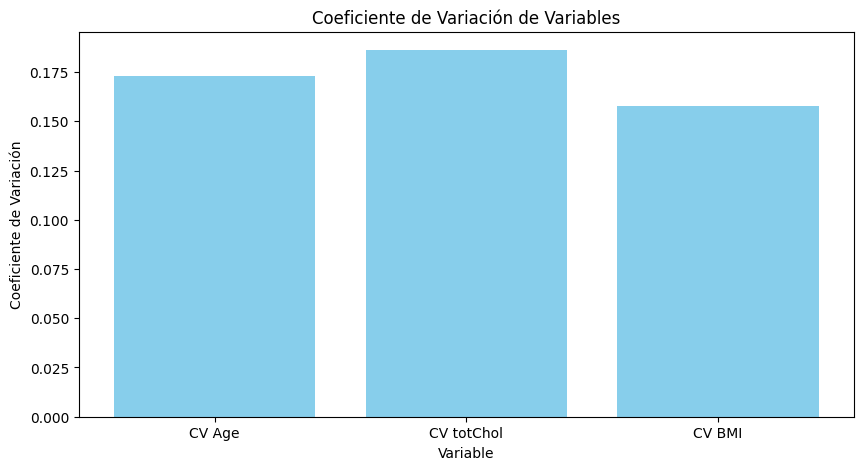

In [11]:
plt.figure(figsize=(10,5))

# Info
labels = ['CV Age', 'CV totChol', 'CV BMI']
values = [cv_age, cv_totchol, cv_bmi]

# Barplot Vertical
plt.bar(labels, values, color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Coeficiente de Variación')
plt.title('Coeficiente de Variación de Variables')
plt.show()

El resultado nos indica que la columna **CV totChol** ✅ es la que mayor dispersión presenta en sus datos.

### **Pregunta N°3:**
Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el dataset "limpio"

In [12]:
# Columnas de interés
features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Diccionario contenedor de rangos intercuartílicos
rangos_outliers = {}

# Cálculo
for feature in features:
    q1 = np.percentile(df[feature],25)
    q3 = np.percentile(df[feature],75)
    iqr = q3 - q1
    
    rangos_outliers[feature] = (float(q1 - 1.5*iqr), float(q3 + 1.5*iqr))

In [13]:
# Condiciones
age_cond = ((df['age'] >= rangos_outliers['age'][0]) & (df['age'] <= rangos_outliers['age'][1]))
cigsperday_cond = ((df['cigsPerDay'] >= rangos_outliers['cigsPerDay'][0]) & (df['cigsPerDay'] <= rangos_outliers['cigsPerDay'][1]))
totchol_cond = ((df['totChol'] >= rangos_outliers['totChol'][0]) & (df['totChol'] <= rangos_outliers['totChol'][1]))
sysbp_cond = ((df['sysBP'] >= rangos_outliers['sysBP'][0]) & (df['sysBP'] <= rangos_outliers['sysBP'][1]))
diabp_cond = ((df['diaBP'] >= rangos_outliers['diaBP'][0]) & (df['diaBP'] <= rangos_outliers['diaBP'][1]))
bmi_cond = ((df['BMI'] >= rangos_outliers['BMI'][0]) & (df['BMI'] <= rangos_outliers['BMI'][1]))
heartrate_cond = ((df['heartRate'] >= rangos_outliers['heartRate'][0]) & (df['heartRate'] <= rangos_outliers['heartRate'][1]))
glucose_cond = ((df['glucose'] >= rangos_outliers['glucose'][0]) & (df['glucose'] <= rangos_outliers['glucose'][1]))

In [14]:
df_clean = df[age_cond & cigsperday_cond & totchol_cond & sysbp_cond & diabp_cond & bmi_cond & heartrate_cond & glucose_cond]
df_clean.shape

(3194, 16)

### **Pregunta N°4:**
¿Qué variables cuantitativas presentan mayor correlación? Explica.

**Respuesta:**

Las variables que presentan mayor correlacion son:

* **diasBP** (presión arterial diastólica) con **sysBP** (presión arterial sistólica) con 0.76 ✅
* **prevalentHyp** (si el paciente era hipertenso o no) con **sysBP** (presión arterial sistólica) con 0.69 ✅
* **prevalentHyp** (si el paciente era hipertenso o no) con **diasBP** (presión arterial diastólica) con 0.6 ✅

Si bien estas variables presentan las mayores correlaciones, ninguna de estas alcanza una correlación superior a `0.8`, por lo cual se consideran una correlaciones moderadas.

Asimismo, las correlaciones de estas variables hacen sentido, por ejemplo es sabido que con el aumento de la presión arterial, hará que las probabilidades de ser hipertenso aumenten.

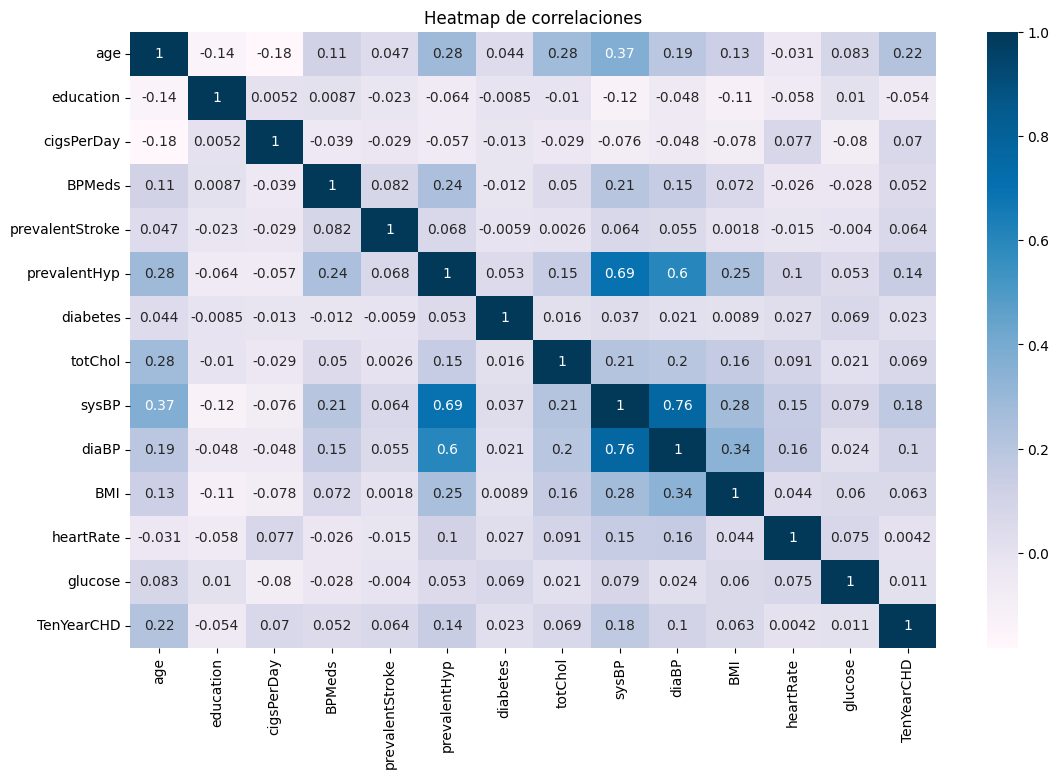

In [15]:
# DataFrame con variables numéricas
df_corr = df_clean[[i for i in df_clean.columns if df_clean.dtypes[i] != 'string[pyarrow]']]

# Correlaciones
corr = df_corr.corr()

# Gráfico de correlaciones
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True, cmap=plt.cm.PuBu)
plt.title("Heatmap de correlaciones")
plt.show()

### **Pregunta N°5:**
Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al índice de masa corporal?

**Respuesta:**
Para esto utilizaremos el cálculo de probabilidad condicional. Se llama probabilidad de A, dado B, a la probabilidad de que el suceso A ocurra si se sabe que ha ocurrido el suceso B. Lo anotamos como P(A|B) donde:

* **A:** Sea Hombre
* **B:** Pertenece al mayor cuartil de BMI

La ecuación utilizada es:

`P(A|B) = P(A n B) / P(B)`

In [16]:
# Total registros
total_df = len(df_clean)

# Condición A
cond_a = df_clean['sex'] == 'M'

# Condición B
cond_b = df_clean['BMI'] >= np.percentile(df_clean['BMI'],75)

# Probabilidad de la Intersección
prob_interseccion = (cond_a & cond_b).sum() / total

# Probabilidad de B (P(B))
prob_b = cond_b.sum() / total

prob_cond = round((prob_interseccion / prob_b) * 100,2)

print(f"La probabilidad de que sea hombre, si se sabe que pertenece al mayor cuartil de BMI es: {prob_cond} %.")

La probabilidad de que sea hombre, si se sabe que pertenece al mayor cuartil de BMI es: 53.87 %.


### **Pregunta N°6:**
¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.

In [17]:
df_clean['heartRate'].describe()

count       3194.0
mean     74.574828
std      10.668343
min           47.0
25%           67.0
50%           75.0
75%           80.0
max          103.0
Name: heartRate, dtype: double[pyarrow]

Observamos que, tanto la mediana como la media son bastante similares, lo que es indicativo de un comportamiento normal. Para validar esto utilizarémos el **gráfico Q-Q** para estar seguros de que los datos sigan esta distribución:

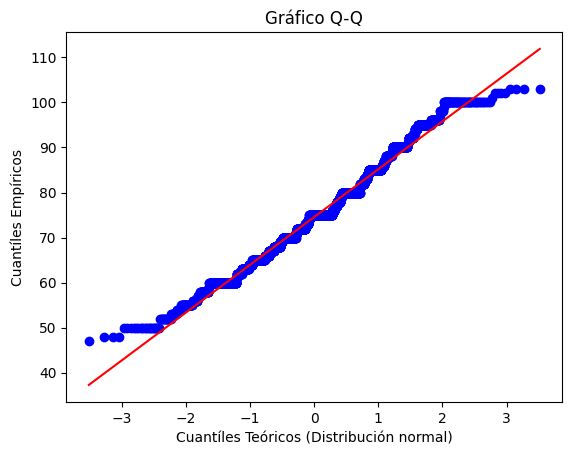

In [18]:
# Generación de gráfico Q-Q
probplot(df_clean['heartRate'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q")
plt.xlabel("Cuantíles Teóricos (Distribución normal)")
plt.ylabel("Cuantíles Empíricos")
plt.show()

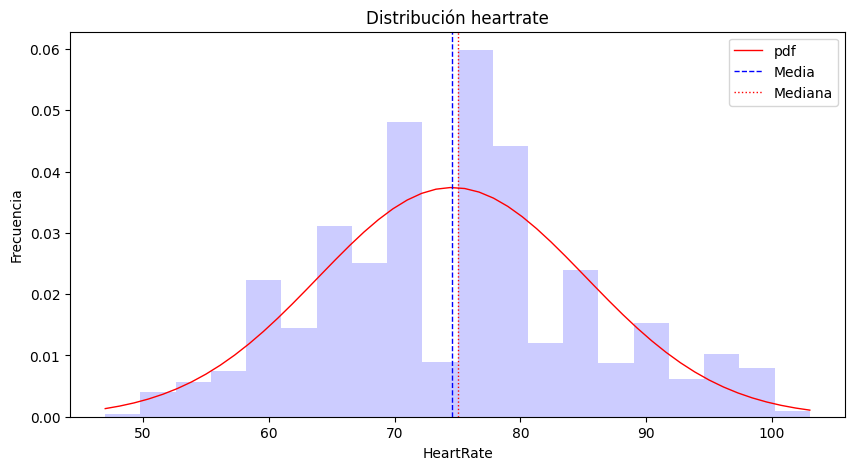

In [19]:
data = df_clean['heartRate']
media = data.mean()
median = np.percentile(data,50)
sigma = data.std()
minimo = data.min()
maximo = data.max()
x = np.linspace(minimo, maximo)
pdf = norm.pdf(x, loc=media, scale=sigma)

# Gráfico
plt.figure(figsize=(10,5))
plt.hist(data, bins=20, alpha=0.2, density=True, color='b')
plt.plot(x,pdf, color='r', linewidth=1, label='pdf')
plt.axvline(media, linewidth=1, color='b', ls='--', label='Media')
plt.axvline(median, linewidth=1, color='r', ls=':', label='Mediana')
plt.title("Distribución heartrate")
plt.ylabel("Frecuencia")
plt.xlabel("HeartRate")
plt.legend()
plt.show()

Una vez habiendo validado el comportamiento normal de esta variable, debemos plantearnos nuestras hipotesis.

* **Hipotesis Nula H0:** mu = 75

* **Hipotesis Alternativa H1:** mu != 75

Como no conocemos la desviación standard de la población total **(σ)**, surge la necesidad de realizar una prueba `t-student`, en la que utilizaremos la desviación standard de la muestra **(s)**.

In [20]:
x = df_clean['heartRate'].mean()
mu_0 = 75
s = df_clean['heartRate'].std()
n = len(df_clean['heartRate'])

# Cálculo t
t = (x - mu_0) / (s / sqrt(n))

In [21]:
# Grados de libertad
df = n - 1

# Cálculo de P-value
p_value = 2 * st.t.cdf(t, df=df)

if p_value < 0.05:
    print("Se rechaza H₀ → la media poblacional no sería 75.")
else:
    print("Se acepta H₀ → la media poblacional sería 75.")

Se rechaza H₀ → la media poblacional no sería 75.


### **Pregunta N°7:**
Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los pacientes fumadores? Explica.

**Respuesta:**

* **Hipótesis nula (H₀):** Ser hombre no influye en el promedio de cigarrillos consumidos por día. Es decir, el promedio es igual entre hombres y mujeres fumadores.

* **Hipótesis alternativa (H₁):** Ser hombre sí influye, es decir, el promedio difiere entre hombres y mujeres fumadores.

In [22]:
# Consumo de cigarro de los hombres
hombres = df_clean[(df_clean['sex'] == 'M') & (df_clean['currentSmoker'] == 'Yes')]['cigsPerDay']

# Consumo de cigarro de las mujeres
mujeres = df_clean[(df_clean['sex'] == 'F') & (df_clean['currentSmoker'] == 'Yes')]['cigsPerDay']

# Realizar una prueba de hipótesis (prueba t de muestras independientes)
t_stat, p_value = st.ttest_ind(hombres, mujeres, equal_var=False)

# Nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Ser hombre sí influye en el consumo de cigarrillos promedio.")
else:
    print("Ser hombre no influye en el consumo de cigarrillos promedio.")

Ser hombre sí influye en el consumo de cigarrillos promedio.


### **Pregunta N°8:**
Construye un modelo de regresión lineal que permita relacionar 6 variables del dataset con el índice de masa corporal. (Debes incluir al menos dos variables cualitativas). Evalúa tu modelo y explica.

**Respuesta**:

Para poder evaluar el poder explicativo del modelo utilizamos R². En este ejercicio un R² de 0.0941 significa que solo el 9.41% de la variabilidad en el BMI se explica por las variables independientes. Esto indica que el modelo explica muy poco del comportamiento del IMC. ❌

In [23]:
# Variable Dependiente
y = df_clean['BMI']

# Variables Independientes
X = df_clean[['age','totChol','prevalentHyp','glucose','diabetes','sysBP']]
X = sm.add_constant(X)

# Calculo de los thetas
model = sm.OLS(y,X.astype(float)).fit()

# Predicciones
predicciones = model.predict(X)

# Error Cuadrático Medio (MSE)
mse = round(((y - predicciones) ** 2).mean(),2)

# Error Cuadrático Medio Explicado (MSE)
emse = round(((y - y.mean()) ** 2).mean(),2)

# Coeficiente de Determinación (R**2)
r_squared = round(model.rsquared,4)

# Error Absoluto Medio (MAE)
mae = round(abs(y - predicciones).mean(),2)

print(f"mse: {mse}")
print(f"emse: {emse}")
print(f"r_squared: {r_squared*100}%")
print(f"mae: {mae}")

mse: 10.89
emse: 12.02
r_squared: 9.41%
mae: 2.64


### **Pregunta N°9:**
Construye un modelo de regresión logística para predecir el riesgo de sufrir una enfermedad coronaria en los próximos diez años, a partir de las variables descritas. Verifica el balanceo de datos y evalúa tu modelo.

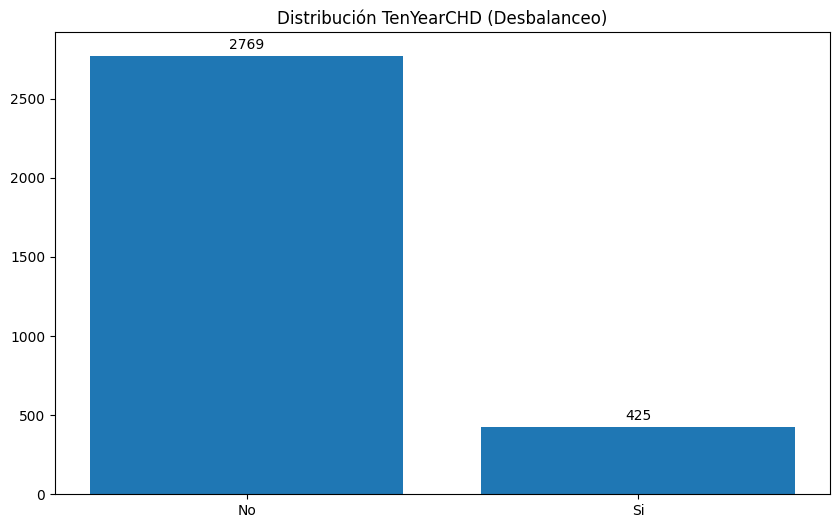

In [24]:
# Evaluación del desbalanceo de la clase
y = df_clean['TenYearCHD']

# Datos
labels = ["No", "Si"]
valores = [y.value_counts()[0], y.value_counts()[1]]

# Gráfico
plt.figure(figsize=(10,6))
barplot = plt.bar(labels, valores)
plt.bar_label(barplot, labels=valores, label_type="edge", padding=3)
plt.ylim([0, valores[0] + 150])
plt.title("Distribución TenYearCHD (Desbalanceo)")
plt.show()

In [25]:
y.value_counts("%")*100

TenYearCHD
0    86.693801
1    13.306199
Name: proportion, dtype: double[pyarrow]

Como podemos observar en la gráfica, vemos que la columna `TenYearCHD` presenta datos desbalanceados. Observamos que sólo un **13.3% (425 pacientes)** ha sufrido una enfermedad coronaria en los últimos 10 años. Para subsanar esto, utilizaremos la técnica **SMOTE**.

In [26]:
# Librerías necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from imblearn.over_sampling import SMOTE

In [27]:
# Variables tipo string a numéricas
df_clean['sex'] = df_clean['sex'].map({'M':0, 'F':1}).astype('int')
df_clean['currentSmoker'] = df_clean['currentSmoker'].map({'No':0, 'Yes':1}).astype('int')

# Variable Independientes
X = df_clean.drop(columns=['TenYearCHD']).values

# Variabla Dependiente
y = df_clean['TenYearCHD'].values

# Estandarizar los features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Utilizamos SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Modelo de Regresión Logística usando SMOTE
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_resampled, y_resampled)

# Predicciones usando SMOTE
y_pred_smote = model_smote.predict(X)

# Calculamos AUC-ROC utilizando SMOTE
roc_auc_smote = roc_auc_score(y, y_pred_smote)

# Calculamos AUC-PR utilizando SMOTE
average_precision_smote = average_precision_score(y, y_pred_smote)

# Modelo de Regresión Logística
model = LogisticRegression(random_state=42)
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)

# Calculamos AUC-ROC utilizando SMOTE
roc_auc = roc_auc_score(y, y_pred)

# Calculamos AUC-PR utilizando SMOTE
average_precision = average_precision_score(y, y_pred)

print("AUC-ROC con SMOTE:", roc_auc_smote)
print("AUC-PR con SMOTE:", average_precision_smote)
print("AUC-ROC sin SMOTE:", roc_auc)
print("AUC-PR sin SMOTE:", average_precision)

AUC-ROC con SMOTE: 0.6770433157011451
AUC-PR con SMOTE: 0.2068968993672905
AUC-ROC sin SMOTE: 0.5160219233955772
AUC-PR sin SMOTE: 0.15042450919002542


Si bien se esperar obtener un resultado sobre 0.7, podemos observar que, al utilizar la ténica SMOTE, obtenemos una mejora sustancial en los que en un valor alto de recall nos indica que el modelo es bueno para identificar la mayoría, si no todos, los casos positivos reales. En este caso un **68%**.

In [28]:
report = classification_report(y, y_pred_smote)
print("Informe de clasificación:")
print(report)

Informe de clasificación:
              precision    recall  f1-score   support

         0.0       0.93      0.67      0.78      2769
         1.0       0.24      0.69      0.36       425

    accuracy                           0.67      3194
   macro avg       0.59      0.68      0.57      3194
weighted avg       0.84      0.67      0.72      3194



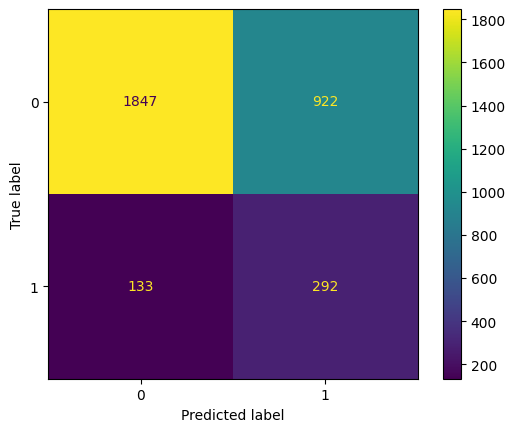

In [29]:
confusion = confusion_matrix(y, y_pred_smote)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [0, 1])
cm_display.plot()
plt.show()

### **Pregunta N°10:**

Separa los modelos de regresión anteriores en dos distintos, respectivamente, considerando alguna variable categórica. Compara y concluye.

**Respuesta:** 
Considerando que, en las preguntas anteriores, ya se utilizaron variables categóricas, es que en este apartado se realizará el ejercio a la inversa: obviando este tipo de variables.

**Regresión Lineal:**
En el caso de este tipo de regresión, al **no** considerar variables categoricas obtuvimos una leve mejora en el R² de 9.41% a 9.56%. ✅

**Regresión Logística:**
Mientras que, en el caso de la Regresión Logística, el no considarar este tip

#### **Regresión Lineal**

In [30]:
# Variable Dependiente
y = df_clean['BMI']

# Variables Independientes
X = df_clean[['age','totChol','prevalentHyp','heartRate','sysBP','cigsPerDay']]
X = sm.add_constant(X)

# Calculo de los thetas
model = sm.OLS(y,X.astype(float)).fit()

# Predicciones
predicciones = model.predict(X)

# Error Cuadrático Medio (MSE)
mse = round(((y - predicciones) ** 2).mean(),2)

# Error Cuadrático Medio Explicado (MSE)
emse = round(((y - y.mean()) ** 2).mean(),2)

# Coeficiente de Determinación (R**2)
r_squared = round(model.rsquared,4)

# Error Absoluto Medio (MAE)
mae = round(abs(y - predicciones).mean(),2)

print(f"mse: {mse}")
print(f"emse: {emse}")
print(f"r_squared: {r_squared*100}%")
print(f"mae: {mae}")

mse: 10.87
emse: 12.02
r_squared: 9.56%
mae: 2.64


#### **Regresión Logística**

In [31]:
# Variable Independientes
X = df_clean.drop(columns=['TenYearCHD','sex','currentSmoker','education','diabetes','prevalentStroke','BPMeds']).values

# Variabla Dependiente
y = df_clean['TenYearCHD'].values

# Estandarizar los features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Utilizamos SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Modelo de Regresión Logística usando SMOTE
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_resampled, y_resampled)

# Predicciones usando SMOTE
y_pred_smote = model_smote.predict(X)

# Calculamos AUC-ROC utilizando SMOTE
roc_auc_smote = roc_auc_score(y, y_pred_smote)

# Calculamos AUC-PR utilizando SMOTE
average_precision_smote = average_precision_score(y, y_pred_smote)

# Modelo de Regresión Logística
model = LogisticRegression(random_state=42)
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)

# Calculamos AUC-ROC utilizando SMOTE
roc_auc = roc_auc_score(y, y_pred)

# Calculamos AUC-PR utilizando SMOTE
average_precision = average_precision_score(y, y_pred)

print("AUC-ROC con SMOTE:", roc_auc_smote)
print("AUC-PR con SMOTE:", average_precision_smote)
print("AUC-ROC sin SMOTE:", roc_auc)
print("AUC-PR sin SMOTE:", average_precision)

AUC-ROC con SMOTE: 0.660403203534935
AUC-PR con SMOTE: 0.19677412243096054
AUC-ROC sin SMOTE: 0.5135759352495062
AUC-PR sin SMOTE: 0.15189318206932118
